<a href="https://colab.research.google.com/github/SSInimgba/Data_Visualizations/blob/master/Lagos_Marathon_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Import the Libraries needed for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats

In [0]:
#Read in the data
pd.set_option('display.max_colwidth', -1)
df2019 = pd.read_csv('LM2019') #Lagos marathon data 2019
df2018 = pd.read_csv('LM2018')#Lagos marathon data 2018
df2017 = pd.read_csv('LM2017')#Lagos marathon data 2017
print("2019: ")
print("---------------------------")
print(df2019.dtypes)
print("  ")
print("2018: ")
print("-----------------------------")
print(df2018.dtypes)
print("  ")
print("2017: ")
print("---------------------------")
print(df2017.dtypes)

2019: 
---------------------------
Unnamed: 0         int64  
category           object 
categoryRank       float64
chipTime           object 
chipTimeInSec      int64  
countryCode        object 
displayDistance    float64
gunTime            object 
gunTimeInSec       int64  
name               object 
rank               int64  
dtype: object
  
2018: 
-----------------------------
Unnamed: 0            int64  
activityType          int64  
bib                   int64  
bibForUrl             int64  
chipTime              object 
chipTimeInSec         int64  
displayDistance       float64
eventId               int64  
gunTime               object 
gunTimeInSec          int64  
id                    int64  
name                  object 
primaryDisplayTime    object 
qualified             bool   
raceId                int64  
rank                  int64  
speedInKmh            float64
splits                object 
validity              float64
dtype: object
  
2017: 
--------------------

In [0]:
df2019.head(3)

,Unnamed: 0,category,categoryRank,chipTime,chipTimeInSec,countryCode,displayDistance,gunTime,gunTimeInSec,name,rank
0,0,Male,1.0,02:17:27,8247,ETHIOPIA,42.195,02:17:28,8248,Sintayehu Legese,1
1,1,Male,2.0,02:18:14,8294,KENYA,42.195,02:18:16,8296,Kipkorir Joshua,2
2,2,Male,3.0,02:19:02,8342,KENYA,42.195,02:19:04,8344,William Yegon,3


In [0]:
df2018.head(3)

,Unnamed: 0,activityType,bib,bibForUrl,chipTime,chipTimeInSec,displayDistance,eventId,gunTime,gunTimeInSec,id,name,primaryDisplayTime,qualified,raceId,rank,speedInKmh,splits,validity
0,0,0,102073,102073,02:15:15.140,8116,42.0,6367782748581224960,02:15:15.140,8116,6368019787825836544,Chip 102073,02:15:15.140,False,1,1,0.0,"[{'distanceInMeter': 0, 'speedInKmh': 0.0, 'speedInKmhRaceAverage': 0.0, 'name': 'Start'}]",NaN
1,1,0,13527,13527,02:15:17.850,8118,42.0,6367782748581224960,02:15:19.550,8120,6368019787825836800,KIBOSS RONNY,02:15:19.550,False,1,2,0.0,"[{'distanceInMeter': 0, 'speedInKmh': 0.0, 'speedInKmhRaceAverage': 0.0, 'name': 'Start'}]",NaN
2,2,0,13512,13512,02:15:20.750,8121,42.0,6367782748581224960,02:15:23.590,8124,6368019787825837056,BITOK BENJAMIN,02:15:23.590,False,1,3,0.0,"[{'distanceInMeter': 0, 'speedInKmh': 0.0, 'speedInKmhRaceAverage': 0.0, 'name': 'Start'}]",NaN


In [0]:
df2017.head(3)

,Unnamed: 0,activityType,bib,bibForUrl,category,categoryRank,chipTime,chipTimeInSec,countryCode,displayDistance,eventId,gunTime,gunTimeInSec,id,name,rank
0,0,0,227,227,Male,1.0,02:15:20,8120,KE,42.195,6234303235265332992,02:15:23,8123,6242697504055921152,ABRAHAM KIPTUM,1
1,1,0,259,259,Male,2.0,02:15:25,8125,KE,42.195,6234303235265332992,02:15:25,8125,6242697504055921408,RONNY KIPKOECH KIBOSS,2
2,2,0,223,223,Male,3.0,02:15:28,8128,KE,42.195,6234303235265332992,02:15:30,8130,6242697504055921664,KIPROTICH KIROI,3


# Data Cleaning

From the preview of our datasets above, we can observe that they deserve some much needed cleaning 

In [0]:
#Let's start by looking at the column names
print("2019 columns: ")
print("---------------------------")
print(df2019.columns)
print("  ")
print("2018 columns: ")
print("-----------------------------")
print(df2018.columns)
print("  ")
print("2017 columns: ")
print("---------------------------")
print(df2017.columns)

2019 columns: 
---------------------------
Index(['Unnamed: 0', 'category', 'categoryRank', 'chipTime', 'chipTimeInSec',
       'countryCode', 'displayDistance', 'gunTime', 'gunTimeInSec', 'name',
       'rank'],
      dtype='object')
  
2018 columns: 
-----------------------------
Index(['Unnamed: 0', 'activityType', 'bib', 'bibForUrl', 'chipTime',
       'chipTimeInSec', 'displayDistance', 'eventId', 'gunTime',
       'gunTimeInSec', 'id', 'name', 'primaryDisplayTime', 'qualified',
       'raceId', 'rank', 'speedInKmh', 'splits', 'validity'],
      dtype='object')
  
2017 columns: 
---------------------------
Index(['Unnamed: 0', 'activityType', 'bib', 'bibForUrl', 'category',
       'categoryRank', 'chipTime', 'chipTimeInSec', 'countryCode',
       'displayDistance', 'eventId', 'gunTime', 'gunTimeInSec', 'id', 'name',
       'rank'],
      dtype='object')


In [0]:
#Let us drop columns that are not useful to us for this analysis
df2019.drop(['Unnamed: 0'], inplace = True, axis = 1)

df2018.drop(['Unnamed: 0', 'activityType',
          'bib','bibForUrl','eventId',
          'qualified','splits','speedInKmh', 'validity'], inplace = True, axis = 1)

df2017.drop(['Unnamed: 0', 'activityType',
          'bib','bibForUrl','eventId'], inplace = True, axis = 1)


In [0]:
#check for null values
print("2019: ")
print("---------------------------")
print(df2019.isnull().sum())
print("  ")
print("2018: ")
print("-----------------------------")
print(df2018.isnull().sum())
print("  ")
print("2017: ")
print("---------------------------")
print(df2017.isnull().sum())

2019: 
---------------------------
category           21
categoryRank       21
chipTime           0 
chipTimeInSec      0 
countryCode        22
displayDistance    0 
gunTime            0 
gunTimeInSec       0 
name               0 
rank               0 
dtype: int64
  
2018: 
-----------------------------
chipTime              0
chipTimeInSec         0
displayDistance       0
gunTime               0
gunTimeInSec          0
id                    0
name                  0
primaryDisplayTime    0
raceId                0
rank                  0
dtype: int64
  
2017: 
---------------------------
category           205
categoryRank       205
chipTime           0  
chipTimeInSec      0  
countryCode        334
displayDistance    0  
gunTime            0  
gunTimeInSec       0  
id                 0  
name               0  
rank               0  
dtype: int64


There is a bunch of missing data in the dataset.

In [0]:
#check for null values
print("2019: ")
print("---------------------------")
print(df2019.groupby('countryCode').count())
print("  ")
print("2017: ")
print("---------------------------")
print(df2017.groupby('countryCode').count())

2019: 
---------------------------
               category  categoryRank  chipTime  chipTimeInSec  \
countryCode                                                      
BENIN          2         2             2         2               
Benin          1         1             1         1               
British        1         1             1         1               
CAMEROON       1         1             1         1               
CAMEROONIAN    1         1             1         1               
Canada         2         2             2         2               
Cross River    1         1             1         1               
ETHIOPIA       12        12            12        12              
FRANCE         2         2             2         2               
HUNGARY        1         1             1         1               
Indian         2         2             2         2               
KENYA          17        17            17        17              
Kenyan         1         1             1 

- For 2019, we can see that some rows have mispellings/variations of the same country thus acting like they are different. We need to group these variations of these countries as one 
- For 2017, the countrycodes do not seem to have any duplicates but we will chnage these to country names

In [0]:
#Start with 2019

#show the differnt values in the column
df2019['countryCode'].value_counts()

NIGERIA          738
Nigeria          39 
KENYA            17 
ETHIOPIA         12 
ROAD WARRIORS    7  
nigeria          3  
BENIN            2  
Canada           2  
Sierra leonne    2  
FRANCE           2  
Indian           2  
CAMEROON         1  
NIgeria          1  
British          1  
CAMEROONIAN      1  
Cross River      1  
SOUTH AFRICA     1  
Kenyan           1  
SIERRA LEONE     1  
indian           1  
HUNGARY          1  
Benin            1  
U.S.A.           1  
USA              1  
Nigertan         1  
Name: countryCode, dtype: int64

We can see the diffrenet variations, for example Nigeria has "NIGERIA", "nigeria", "Nigertan" and "NIgeria". We need to combine these different variations into one

In [0]:
cleanup_rows = {'countryCode':{'NIGERIA':'Nigeria',
                               'nigeria': 'Nigeria',
                               'Nigertan':'Nigeria',
                              'NIgeria':'Nigeria',
                               'KENYA':'Kenya',
                               'Kenyan':'Kenya',
                               'ETHIOPIA': 'Ethiopia',
                               'ROAD WARRIORS':'Road Warriors',
                              'FRANCE':'France',
                               'Indian':'India',
                               'indian':'India',
                              'Sierra leonne': 'Sierra Leone',
                               'SIERRA LEONE': 'Sierra Leone',
                              'BENIN':'Benin',
                              'HUNGARY': 'Hungary',
                               'CAMEROONIAN': 'Cameroon',
                               'CAMEROON':'Cameroon',
                               'U.S.A.':'USA',
                               'Cross River': 'Nigeria',
                               'British':'UK',
                               'SOUTH AFRICA':'South Africa'}}
df2019.replace(cleanup_rows, inplace = True)
print(df2019['countryCode'].value_counts())
df2019['countryCode'].unique()

Nigeria          783
Kenya            18 
Ethiopia         12 
Road Warriors    7  
India            3  
Benin            3  
Sierra Leone     3  
Cameroon         2  
Canada           2  
France           2  
USA              2  
Hungary          1  
UK               1  
South Africa     1  
Name: countryCode, dtype: int64

The variations have been removed and everything looks nicer

In [0]:
df2017.groupby('countryCode').count()

,category,categoryRank,chipTime,chipTimeInSec,displayDistance,gunTime,gunTimeInSec,id,name,rank
countryCode,,,,,,,,,,
CA,1,1,1,1,1,1,1,1,1,1
CM,2,2,2,2,2,2,2,2,2,2
ET,7,7,7,7,7,7,7,7,7,7
GB,1,1,1,1,1,1,1,1,1,1
GH,4,4,4,4,4,4,4,4,4,4
JP,1,1,1,1,1,1,1,1,1,1
KE,20,20,20,20,20,20,20,20,20,20
NG,626,626,627,627,627,627,627,627,627,627
TZ,1,1,1,1,1,1,1,1,1,1


In [0]:
cleanup_rows = {'countryCode':{'NG':'Nigeria',
                               'KE':'Kenya',
                               'ET': 'Ethiopia',
                               'GH':'Ghana',
                               'CM': 'Cameroon',
                              'CA': 'Canada',
                               'TZ': 'Tanzania',
                               'US':'USA',
                               'JP': 'Japan',
                               'ZW':'Zimbabwe',
                               'GB':'UK'}}
df2017.replace(cleanup_rows, inplace = True)
df2017['countryCode'].unique()

array(['Kenya', 'Ethiopia', 'Zimbabwe', 'Tanzania', 'Nigeria', 'Cameroon',
       'Ghana', nan, 'USA', 'Japan', 'UK', 'Canada'], dtype=object)

# DATA VISUALIZATIONS 

In [0]:
#1st analysis Number of Women who ran Vs Number of men who ran
#2018 dataset does not have records of runners by gender, so we will not include them in this analysis
df2019.rename(columns = {'category':'gender','categoryRank':'genderRank'}, inplace=True)
df2017.rename(columns = {'category':'gender','categoryRank':'genderRank'}, inplace=True)

gender
Female    81 
Male      760
Name: genderRank, dtype: int64


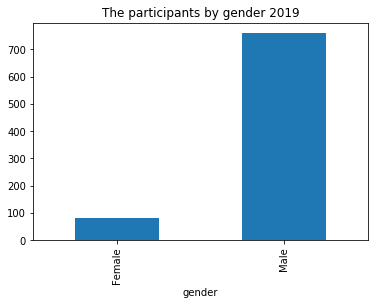

gender
Female    105
Male      690
Name: genderRank, dtype: int64


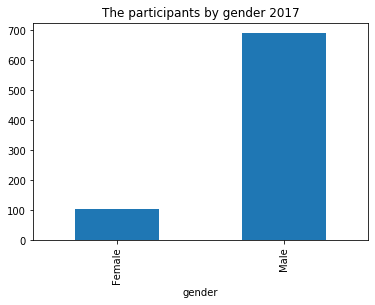

In [0]:
df2019.groupby('gender')['genderRank'].count().plot(kind ='bar');
print(df2019.groupby('gender')['genderRank'].count())
plt.title('The participants by gender 2019');
plt.show()

df2017.groupby('gender')['genderRank'].count().plot(kind ='bar');
print(df2017.groupby('gender')['genderRank'].count())
plt.title('The participants by gender 2017');
plt.show()

Men participated more than women in the marathons held in 2017 and 2019.

## How many countries ran in the 2019 Lagos marathon?

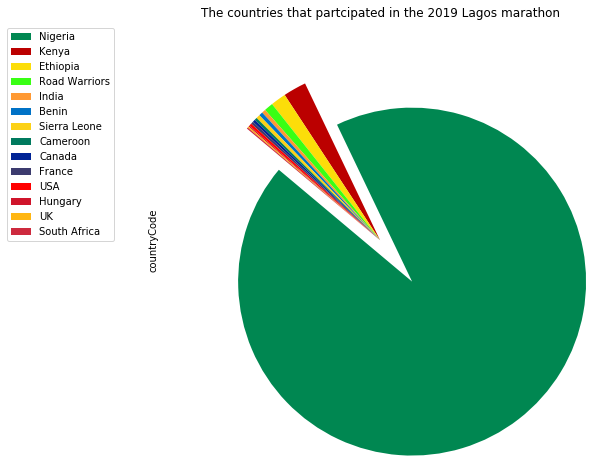

In [0]:

explode = (0.3,0,0,0,0,0,0,0,0,0,0,0,0,0)
colors = ['#008751','#BB0000','#FCDD09', '#39FF14',
          '#FF9933','#0072C6','#FCD116','#007A5E','#002395','#3C3B6E','#FF0000',
         '#CF142B','#FFB612','#CD2A3E']
df2019['countryCode'].value_counts().plot(kind='pie',
                                               explode=explode,
                                               startangle=140,
                                      colors = colors,
                                      labels = None, figsize=(8, 8));
plt.title('The countries that partcipated in the 2019 Lagos marathon');
plt.legend(labels = df2019['countryCode'].value_counts().index, loc = 'best',
           bbox_to_anchor=(-0.1, 1.));


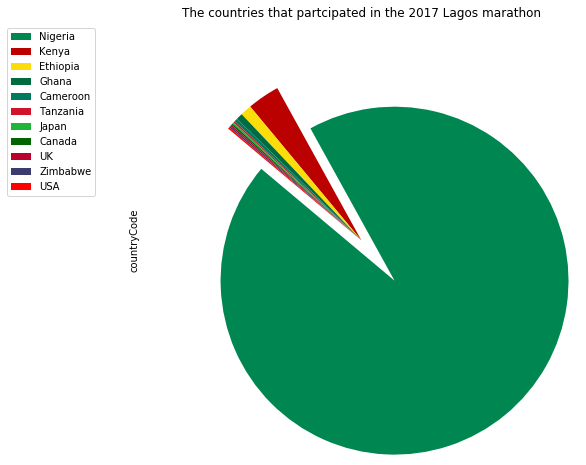

In [0]:

#How many countries ran in the lagos marathon in 2017
explode = (0.3,0,0,0,0,0,0,0,0,0,0)
colors = ['#008751','#BB0000','#FCDD09','#006B3F',
          '#007A5E','#CF142B','#1EB53A','#006400','#BC002D','#3C3B6E','#FF0000']
df2017['countryCode'].value_counts().plot(kind='pie',
                                               explode=explode,
                                               startangle=140,
                                       colors=colors,
                                               labels = None,
                                              figsize=(8, 8));
plt.title('The countries that partcipated in the 2017 Lagos marathon');
plt.legend(labels =  df2017['countryCode'].value_counts().index,
        bbox_to_anchor=(-0.1, 1.));

Nigerians make up more than half of the runners. However, less countries participated in the 2017 marathon race

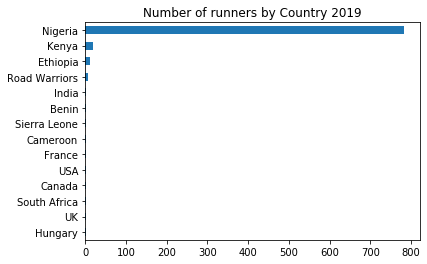

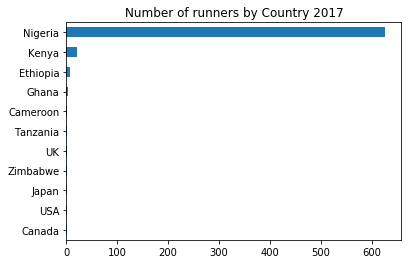

In [0]:
color = ['#008751','#BB0000','#FCDD09', '#39FF14',
          '#FF9933','#0072C6','#FCD116','#007A5E','#002395','#3C3B6E','#FF0000',
         '#CF142B','#FFB612','#CD2A3E']
df['countryCode'].value_counts().sort_values(ascending = True).plot(kind = 'barh');
plt.title('Number of runners by Country 2019');
plt.show()



df3['countryCode'].value_counts().sort_values(ascending = True).plot(kind = 'barh');
plt.title('Number of runners by Country 2017');
plt.show()

The host country has more than twice the particiants than the other countries.

In [0]:
#Find the fastest countries
print(df2019['countryCode'].head(10).value_counts())

print(df2019['countryCode'].head(10).value_counts())


Kenya       8
Ethiopia    2
Name: countryCode, dtype: int64
Kenya       8
Ethiopia    2
Name: countryCode, dtype: int64


Kenyas and Ethiopians are more likely to finish faster than any other country

In [0]:
#Experiment to find the fastest countries
df2019copy = df2019.copy()
df2018copy = df2018.copy()
df2017copy = df2017.copy()
df2019['chipTime'] = pd.to_timedelta(df2019['chipTime'])
df2018copy['chipTime'] = pd.to_timedelta(df2018['chipTime'])
df2017copy['chipTime'] = pd.to_timedelta(df2017['chipTime'])
print("2019: ")
print("---------------------------")
print(df2019copy.dtypes)
print("  ")
print("2018: ")
print("-----------------------------")
print(df2018copy.dtypes)
print("  ")
print("2017: ")
print("---------------------------")
print(df2017copy.dtypes)


2019: 
---------------------------
gender             object         
genderRank         float64        
chipTime           timedelta64[ns]
chipTimeInSec      int64          
countryCode        object         
displayDistance    float64        
gunTime            object         
gunTimeInSec       int64          
name               object         
rank               int64          
dtype: object
  
2018: 
-----------------------------
chipTime              timedelta64[ns]
chipTimeInSec         int64          
displayDistance       float64        
gunTime               object         
gunTimeInSec          int64          
id                    int64          
name                  object         
primaryDisplayTime    object         
raceId                int64          
rank                  int64          
dtype: object
  
2017: 
---------------------------
gender             object         
genderRank         float64        
chipTime           timedelta64[ns]
chipTimeInSec      int64

In [0]:
#Compare the runtime means by country
df2019copy.head(10).groupby([
        'countryCode',
        'gender']).agg({'chipTime': lambda x: np.mean(x), 'countryCode': 'size' })

,,chipTime,countryCode
countryCode,gender,,
Ethiopia,Male,02:18:48,2
Kenya,Male,02:21:43.875000,8


In [0]:
#Compare the runtime means by country
df2017copy.groupby([
        'countryCode',
        'gender']).agg({'chipTime': lambda x: np.mean(x), 'countryCode': lambda x: np.size(x)/df2017copy.shape[0]})

chipTime  countryCode
countryCode gender                             
Cameroon    Male   03:34:18         0.002      
Canada      Male   04:26:44         0.001      
Ethiopia    Female 02:52:58         0.005      
            Male   02:18:08.500000  0.002      
Ghana       Male   03:25:13.750000  0.004      
Japan       Male   04:06:23         0.001      
Kenya       Female 02:41:51.500000  0.008      
            Male   02:19:17.666666  0.012      
Nigeria     Female 04:08:38.814285  0.070      
            Male   04:14:15.278776  0.556      
Tanzania    Male   02:30:13         0.001      
UK          Male   04:08:06         0.001      
USA         Male   03:52:41         0.001      
Zimbabwe    Male   02:29:25         0.001

The difference between the first 10 men finish time and the first 10 women finish time 

In [0]:
df2017copy.head(40).groupby(['genderRank','gender','chipTime']).agg({'chipTime':lambda x: np.mean(x)}).head(20)

chipTime
genderRank gender chipTime         
1.0        Female 02:37:50 02:37:50
           Male   02:15:20 02:15:20
2.0        Female 02:38:21 02:38:21
           Male   02:15:25 02:15:25
3.0        Female 02:39:02 02:39:02
           Male   02:15:28 02:15:28
4.0        Female 02:39:20 02:39:20
           Male   02:16:49 02:16:49
5.0        Female 02:40:48 02:40:48
           Male   02:16:55 02:16:55
6.0        Female 02:40:47 02:40:47
           Male   02:16:58 02:16:58
7.0        Female 02:42:17 02:42:17
           Male   02:17:34 02:17:34
8.0        Female 02:43:50 02:43:50
           Male   02:18:47 02:18:47
9.0        Female 02:44:51 02:44:51
           Male   02:19:22 02:19:22
10.0       Female 02:49:21 02:49:21
           Male   02:20:05 02:20:05

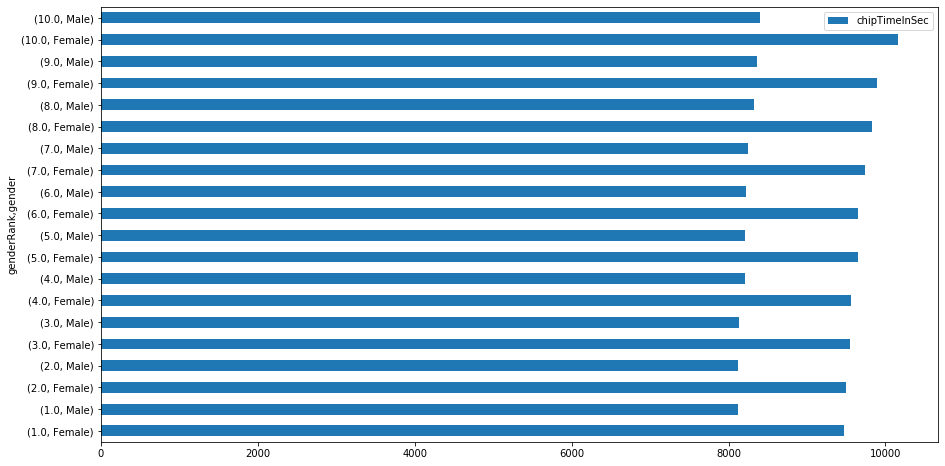

In [0]:
pd.pivot_table(df2017copy, index =[ 'genderRank','gender'], values ='chipTimeInSec').head(20).plot(kind ='barh',figsize= (15,8));

In [0]:
#updrade seaborn
# !pip install seaborn==0.9.0

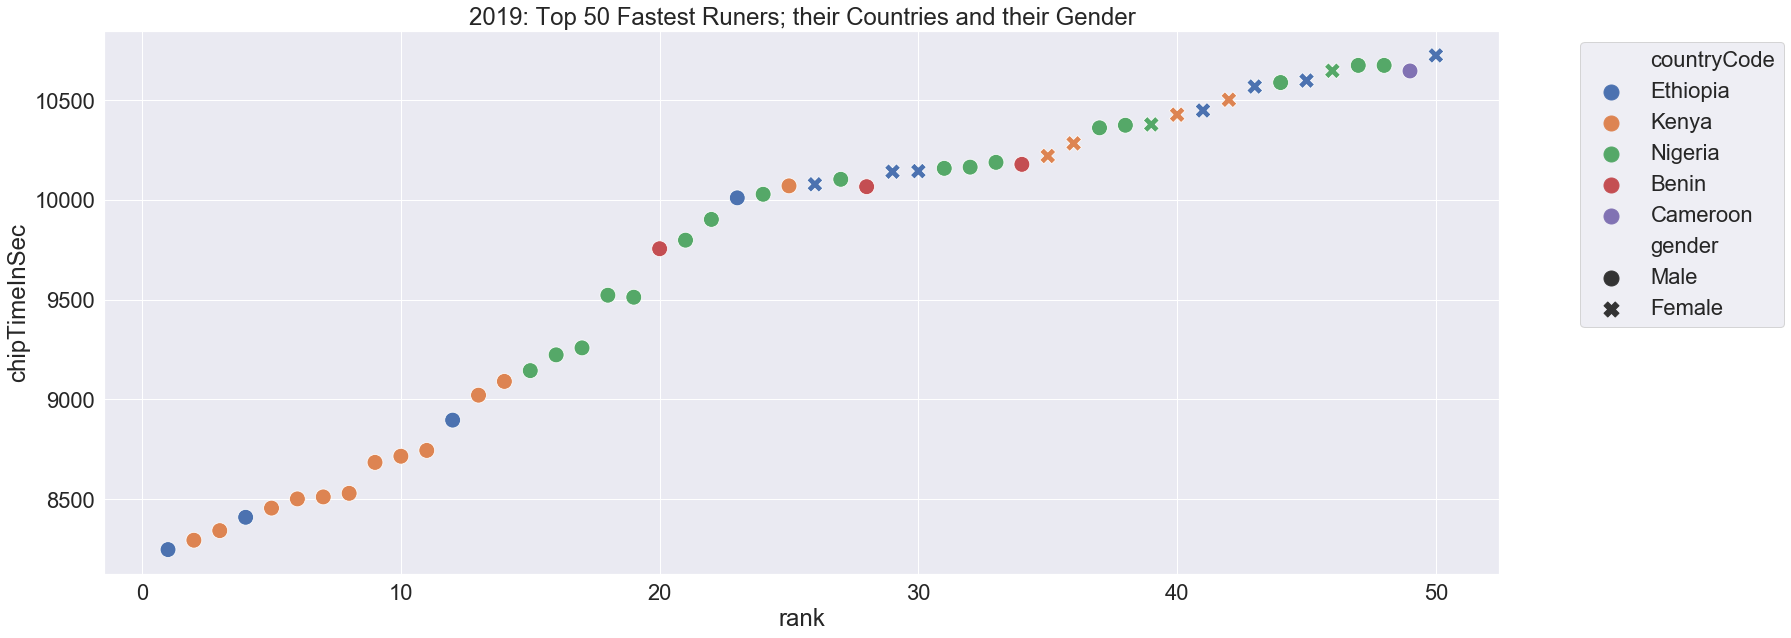

In [0]:
#Top 50 finish times(secs) by gender
plt.figure(figsize= (25,10));
sns.set(font_scale= 2.0)
#ax = plt.subplots()
ax = sns.scatterplot(s = 250, data = df2019copy.head(50),
           x = 'rank', y = 'chipTimeInSec',
           hue = 'countryCode', style = 'gender');
ax.legend(markerscale = 2.5, bbox_to_anchor=(1.05,1));
plt.title("2019: Top 50 Fastest Runers; their Countries and their Gender")
plt.show();




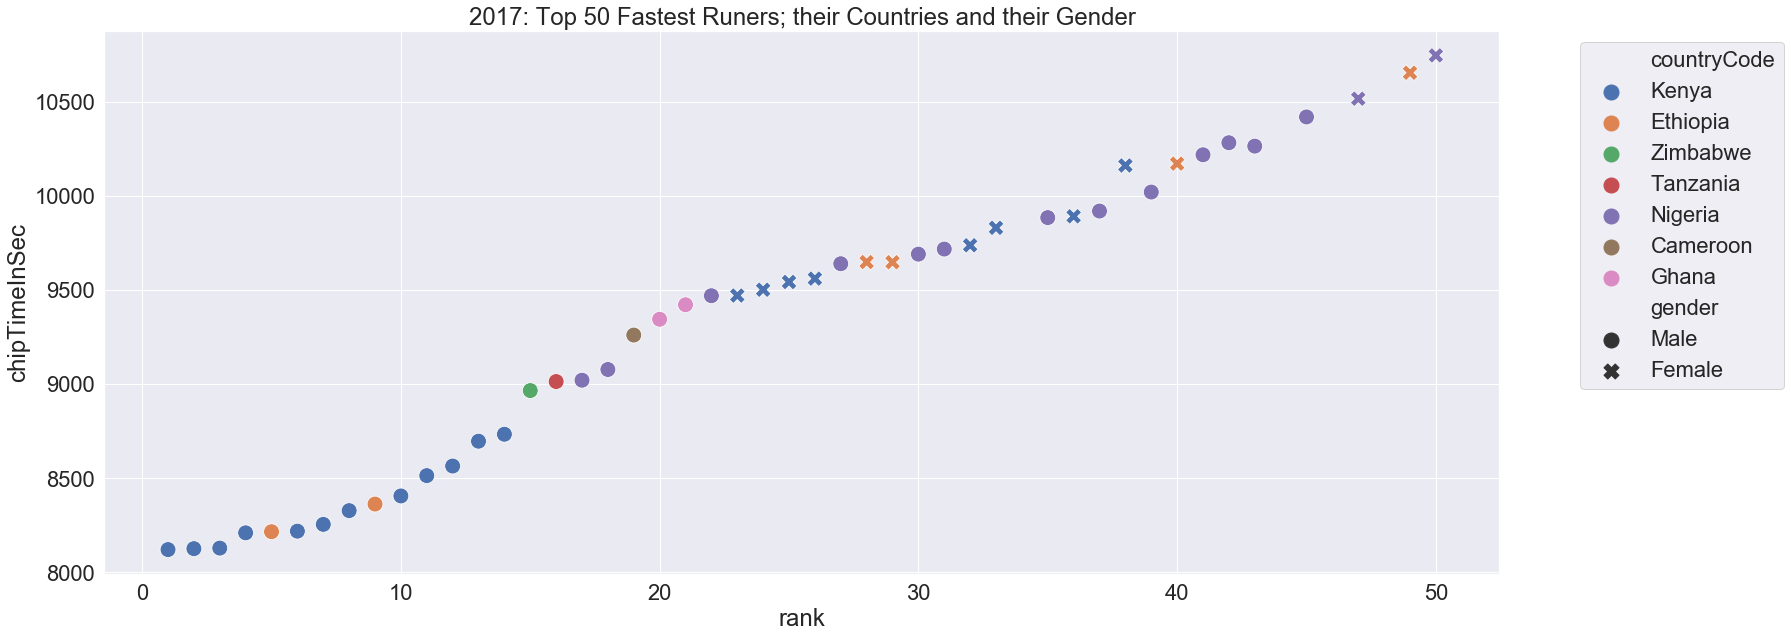

In [0]:
plt.figure(figsize= (25,10));
ax = sns.scatterplot(s = 250, data = df2017copy.head(50),
           x = 'rank', y = 'chipTimeInSec',
           hue = 'countryCode', style = 'gender');
ax.legend(markerscale = 2.5, bbox_to_anchor=(1.05,1));
plt.title("2017: Top 50 Fastest Runers; their Countries and their Gender")
plt.show();

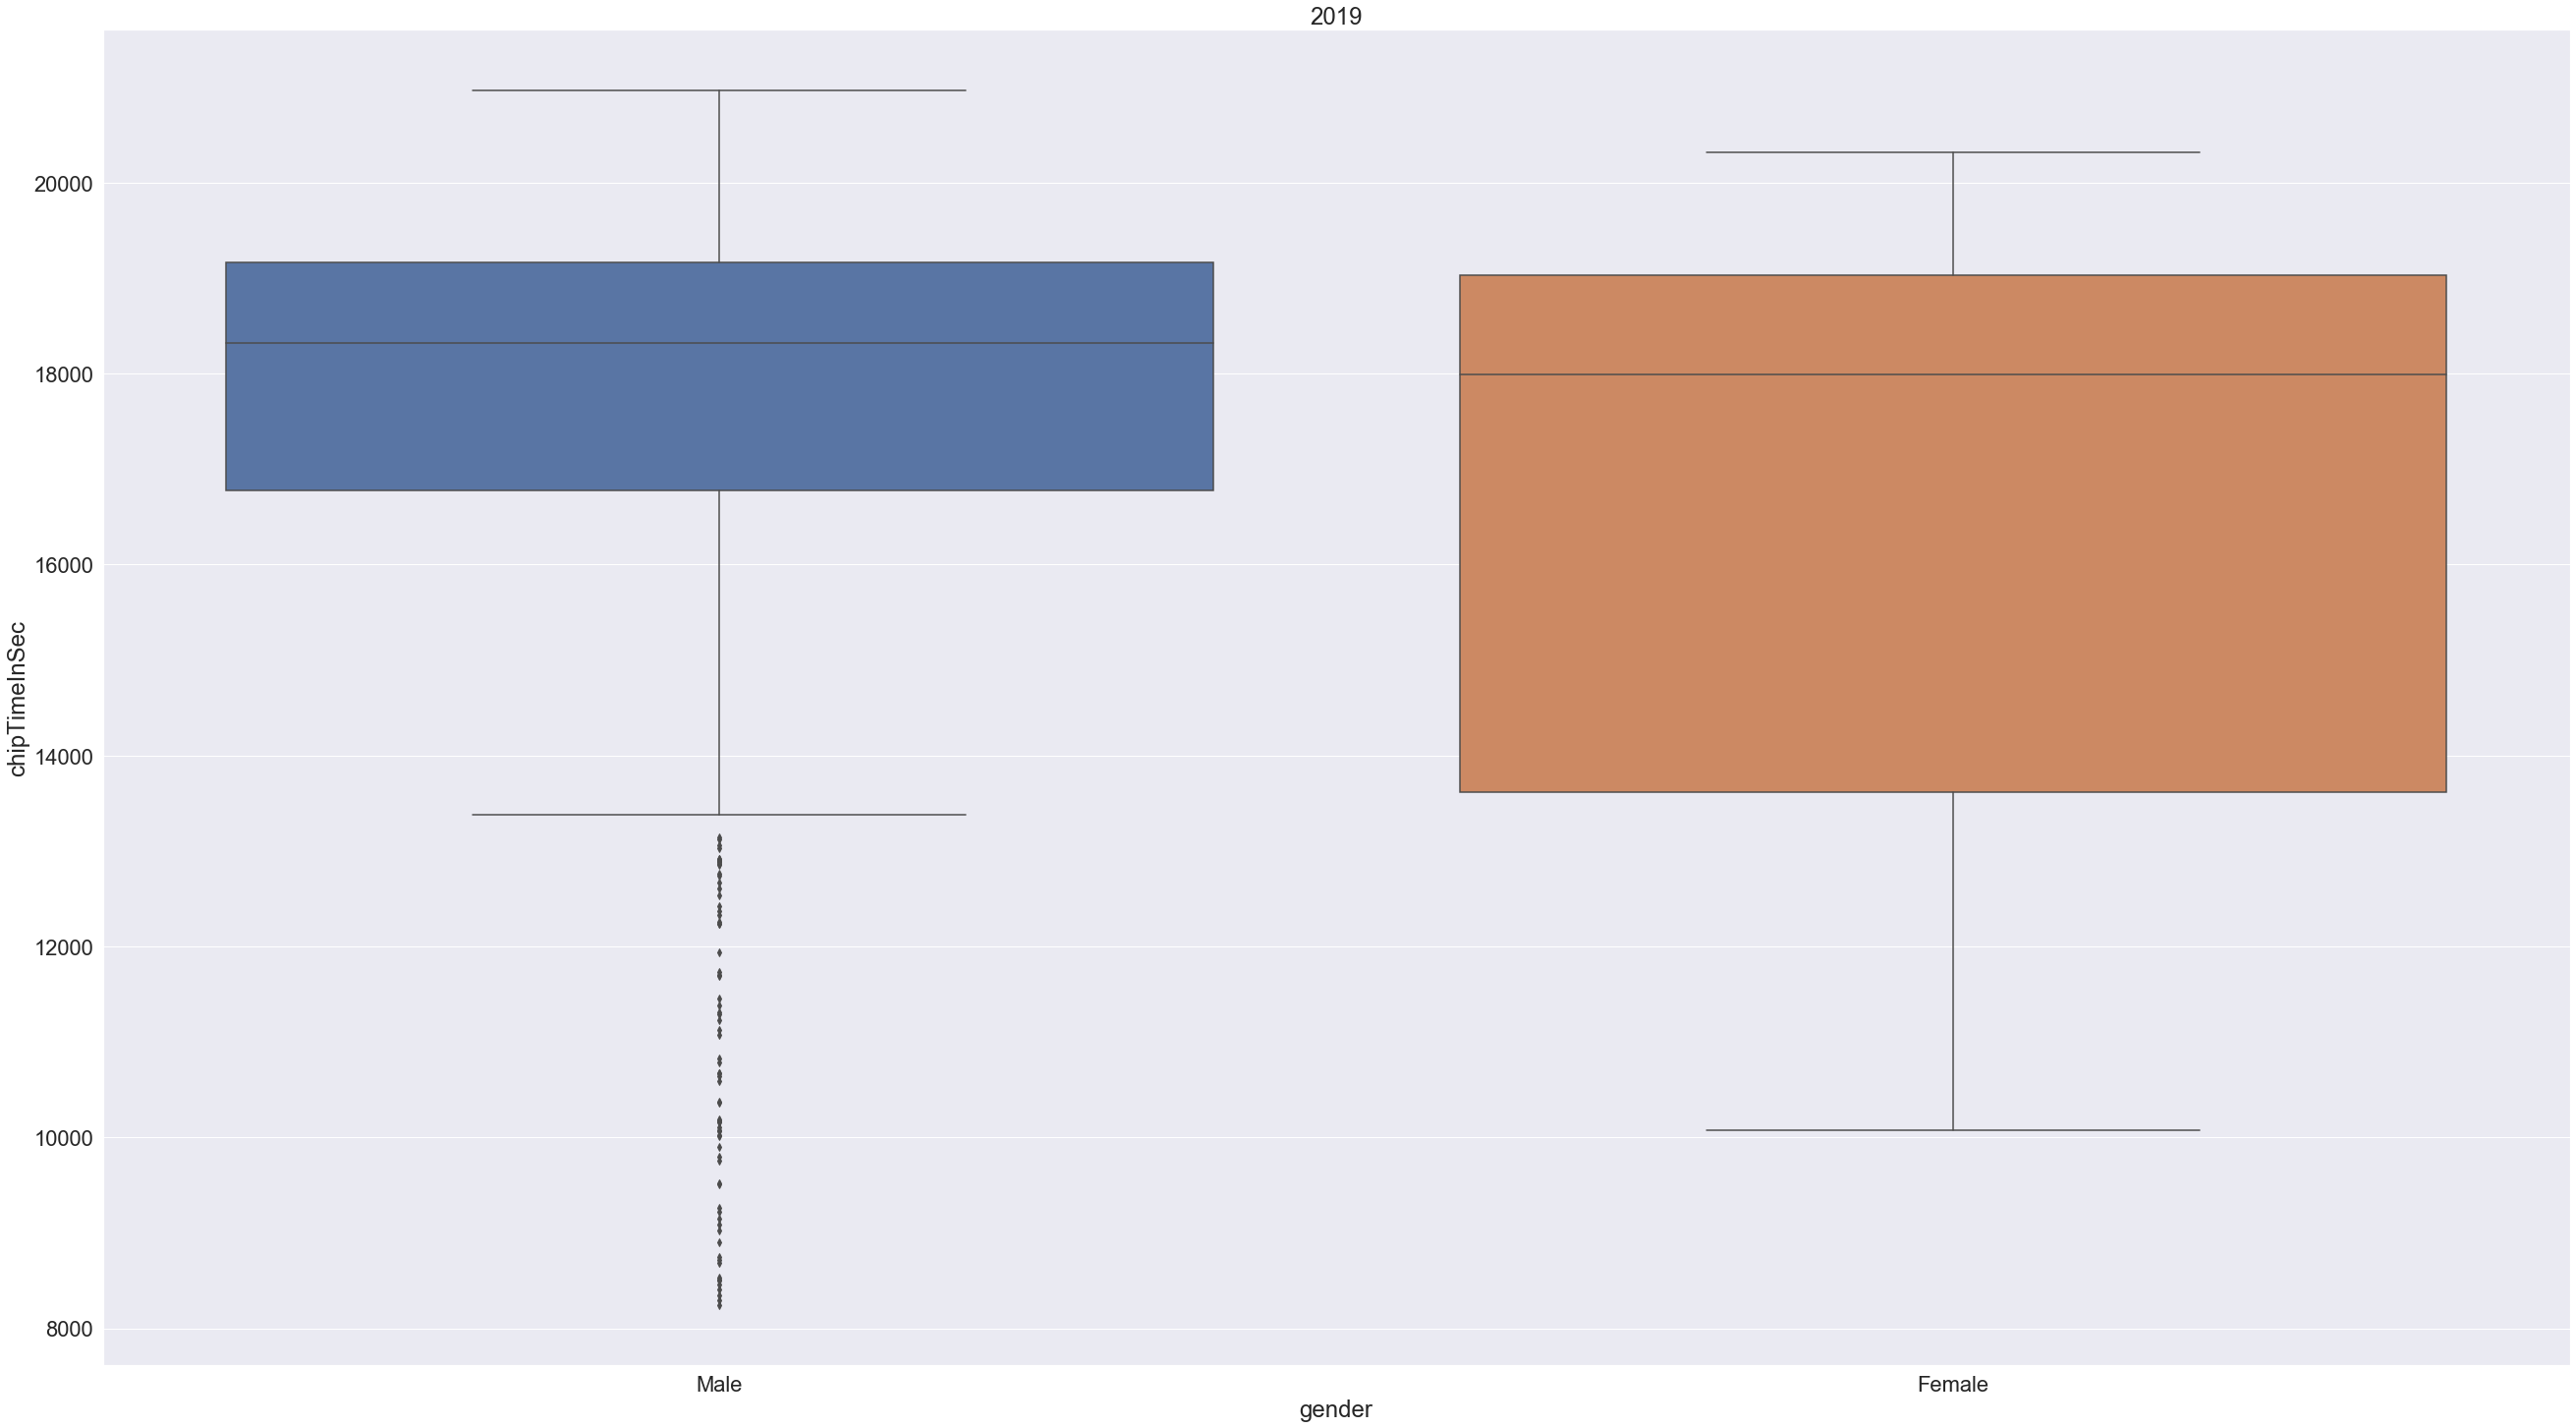

In [0]:
#2019
plt.figure(figsize= (45,25));
ax = sns.boxplot( x = 'gender', y = 'chipTimeInSec', data = df2019copy);
plt.title("2019");
plt.show();

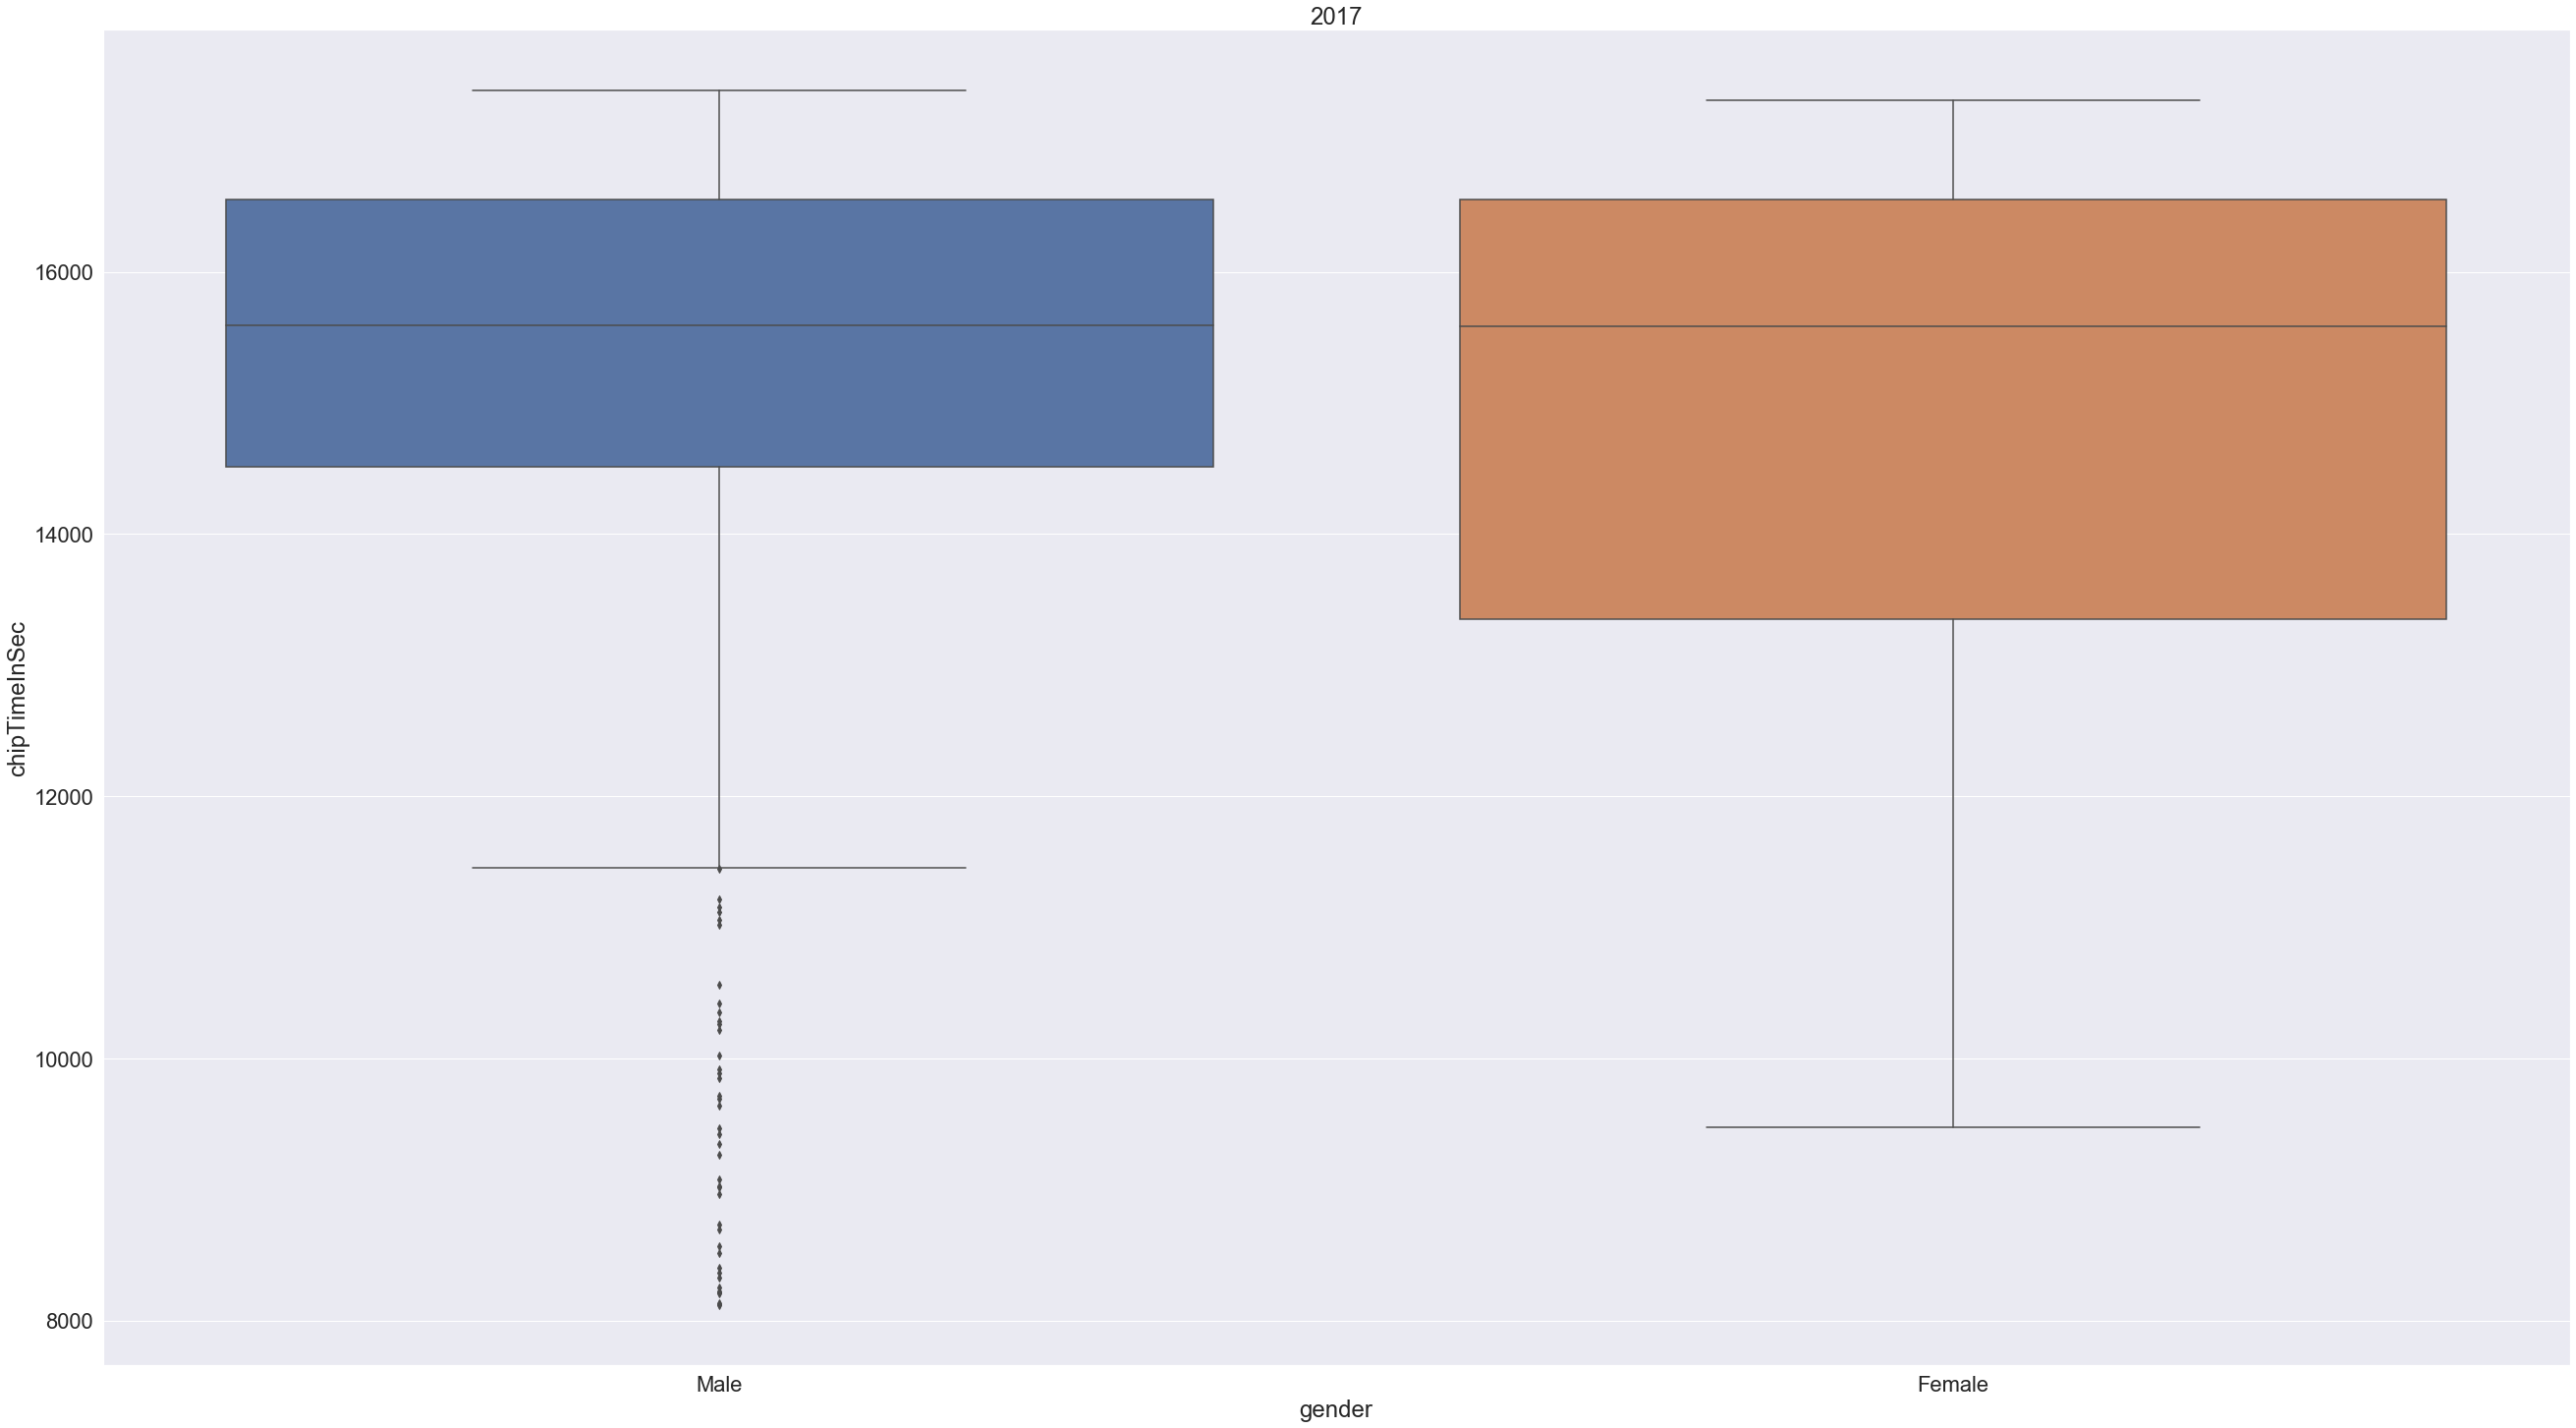

In [0]:
#2019
plt.figure(figsize= (45,25));
ax = sns.boxplot( x = 'gender', y = 'chipTimeInSec', data = df2017copy);
plt.title("2017");
plt.show();

Boxplot is used to show the variablity of the data

- For 2019 and 2017, the women have a larger range of finish time (inidcated by a larger box) when compared to the men.

Most of the elite runners which is classified here as anomalies (considering that whne compared to the other runners these set of runners finish at a quicker time), are men. 

In [0]:
#fastest countries
df2019copy.head(50).groupby('countryCode')['chipTime'].apply(lambda x: np.mean(x)).sort_values(ascending = True)

countryCode
Kenya      02:32:29.250000
Ethiopia   02:44:02.090909
Benin      02:46:39.666666
Nigeria    02:47:16.631578
Cameroon   02:57:26       
Name: chipTime, dtype: timedelta64[ns]

For 2019, without balancing out the number of samples, it seems that Kenya, Ethiopa and Benin are the top 3 countries with the fastest runners. 

In [0]:
#fastest countries
df2017copy.groupby('countryCode')['chipTime'].apply(lambda x: np.mean(x)).sort_values(ascending = True)

countryCode
Kenya           02:42:52.555555
Benin           02:46:39.666666
Ethiopia        02:47:53.916666
Cameroon        03:26:56.500000
Sierra Leone    03:46:10.333333
India           03:50:23       
Canada          04:43:04       
South Africa    04:46:42       
Hungary         04:47:46       
Road Warriors   04:51:36.857142
Nigeria         04:56:15.888888
France          05:04:18       
UK              05:27:04       
USA             05:35:22       
Name: chipTime, dtype: timedelta64[ns]

For 2017, without balancing out the number of samples, it seems that Kenya, Benin and Ethiopia are the top 3 countries with the fastest runners. 

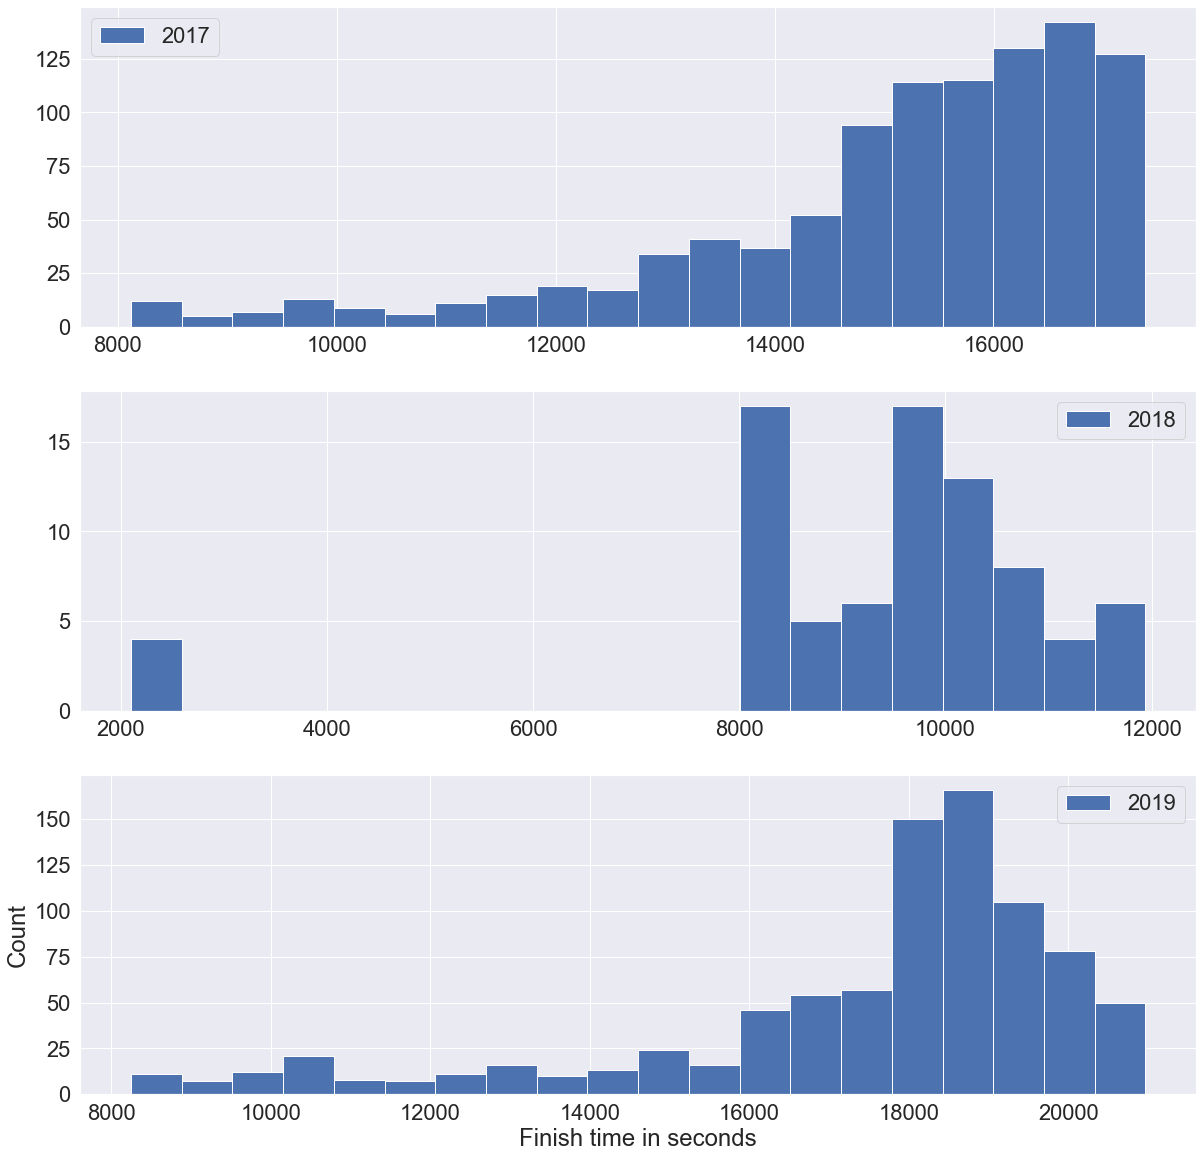

In [0]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize =(20,20))
ax1.hist(df2017copy['chipTime'].astype('timedelta64[s]'), bins= 20);
ax1.legend(['2017']);
plt.xlabel('Finish time in seconds')
plt.ylabel('Count')
ax2.hist(df2018copy['chipTime'].astype('timedelta64[s]'), bins= 20);
ax2.legend(['2018']);
plt.xlabel('Finish time in seconds')
plt.ylabel('Count')
ax3.hist(df2019copy['chipTime'].astype('timedelta64[s]'), bins= 20);
ax3.legend(['2019']);
plt.xlabel('Finish time in seconds')
plt.ylabel('Count')
plt.show()

- 2017 and 2019 are all left skewed which means that majority of the runners took a longer time to finish the race, while a few elite runners finished earlier. This is a pattern that is generally seen in marathon finish times
- For, 2018 has a lot of missing data, so we can only assume that it is also left skewed.
